# Exploratory Data Analysis

### Setup

In [2]:
import os
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("../")

import config.environvars as environvars
import config.credentials as credentials
import data.extract
import data.transform

import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(environvars.paths.path_swissdox+"swissdox.csv")
df = df[df["language"] == "de"]

## Problem 1:

We need to identify whether news article is actually relevant or not, i.e. is it about economics/finance or something else like sport?

In [8]:
df["rubric"].value_counts().reset_index().head

<bound method NDFrame.head of                                                  rubric  count
0                                            Wirtschaft  13088
1                                            wirtschaft   5792
2                                               Schweiz   2965
3                                                 Front   2769
4                                           Schwerpunkt   2336
...                                                 ...    ...
2381  Wirtschaft - Trotz des starken Frankens: Schwe...      1
2382  Wirtschaft - Baugewerbe erwartet Umsatzrückgan...      1
2383  Politik - Alexandre Fasel: Wer ist der neue ED...      1
2384  Wirtschaft - Turbulenter Start der Aktie von C...      1
2385  SonntagsBlick - Mitte-Nationalrat Martin Lando...      1

[2386 rows x 2 columns]>

Portion of articles without a rubric to begin with:

In [16]:
round(df["rubric"].isna().sum()/df.shape[0], 4)

0.2932

In [23]:
df["id"] = df["medium_name"] + ": " + df["rubric"]
id = df["id"].value_counts().reset_index()

/var/folders/3r/5d6j_0050w3frvplp453m0fc0000gn/T/ipykernel_21936/104111486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["id"] = df["medium_name"] + ": " + df["rubric"]


rules:
wenn media fuw -> wirtschaft
wenn media handelszeitung -> wirtschaft
_recommendations_ -> NA
Front -> NA
Schweiz, Svizzera, suisse -> NA
blog -> NA
sonntagszeitung -> NA
meinung -> NA
zuerich, region -> NA
schwerpunkt -> NA

zum useneh:
srf video
srf audio


look https://www.youtube.com/watch?v=eOu-h_XxjHQ for ML approach classify

here interesting https://www.frbsf.org/research-and-insights/data-and-indicators/daily-news-sentiment-index/

In [72]:
df.head

<bound method NDFrame.head of                                   id                 pubtime medium_code  \
0            zuonline.ch: Raiffeisen  2022-04-18 18:59:58+02        ZHUO   
3               Glückspost: BERATUNG  2022-01-20 00:00:00+01          GP   
4              fuw.ch: morgen-report  2023-02-16 07:39:52+01        FUWO   
5                                NaN  2022-09-01 13:37:00+02        CASO   
6                                NaN  2023-06-06 11:49:16+02        CASO   
...                              ...                     ...         ...   
109858        srf.ch: News - Schweiz  2022-05-01 11:44:00+02         SRF   
109859                           NaN  2023-01-26 17:53:08+01        CASO   
109860                           NaN  2022-05-01 13:09:17+02        CASO   
109861                fuw.ch: markte  2022-12-09 18:00:05+01        FUWO   
109862  Finanz und Wirtschaft: Front  2022-10-15 00:00:00+02         FUW   

                  medium_name          rubric regional do

In [104]:
content_id = "03a801e8-e72c-d3e2-8276-69ebd9a7816a" # 18
import data.extract
test = data.extract.swissdox.query_inputs
test = [i for i in test if i["query_name"] == "kantonalbank_baselstadt"]
test
# print(df[df["content_id"] == content_id]["query_bank"])

# article = df[df["content_id"] == content_id]["content"].drop_duplicates()
# article

# article = article[18]
# article = article.lower()


# import re

# lead = re.findall(r"<ld>(.*?)</ld>", article)
# lead

# article = article.split("</p>")
# article = [data.transform.preprocess.remove_tags(item) for item in article]





# def print_article(df, content_id):
    # article = df[df["content_id"] == content_id]["content"].drop_duplicates()

[{'query_name': 'kantonalbank_baselstadt',
  'content': {'AND': [{'OR': ['*asler* Kantonalbank',
      'BKB',
      'BSKP',
      'BSKP:SWX',
      'SWX:BSKP',
      '*anque *antonale de *le']}]},
  'from': '2022-01-01',
  'to': '2023-06-30',
  'ric': 'BSKP.S'}]

In [22]:
df = df[~df["medium_code"].isin(["SRFA", "SRFV"])]

# SRFA, SRFV

In [11]:
print(df[df["rubric"] == "Region"]["content"].iloc[0])
print(df[df["rubric"] == "Region"]["query_bank"].iloc[0])

<tx><ld><p>Der erwartete Überschuss des Kantons ist fast sechsmal höher als budgetiert.</p></ld><p>Von Prognose zu Prognose wird das Resultat besser: Wie die dritte Hochrechnung des Basler Finanzdepartements zeigt, beträgt der prognostizierte Überschuss für das abgelaufene Jahr 352 Millionen Franken. Anfänglich sah das vom Grossen Rat genehmigte Budget ein Plus von 61 Millionen Franken vor. Bereits in der zweiten Hochrechnung Ende September zeichnete sich ein Überschuss in der Höhe von 221 Millionen Franken ab. Nun sind es nochmals ganze 130 Millionen mehr.</p><p>Vor allem die Steuereinnahmen entwickeln sich weit positiver als ursprünglich gedacht. Bei der Erstellung des Budgets sei die Unsicherheit bei den Steuererträgen wegen der Coronakrise noch gross gewesen, sagt Markus König, Leiter der Finanzverwaltung. Sowohl bei den Unternehmen als auch bei den Privatpersonen fielen die Einnahmen deutlich höher aus als erwartet.</p><p>Hinzu kommen unter anderem die bereits kommunizierten Mehre

In [4]:
df["medium_name"].value_counts()

medium_name
cash.ch                      14110
fuw.ch                        5608
handelszeitung.ch             3851
tagblatt.ch                   3560
Finanz und Wirtschaft         2660
                             ...  
Bolero                           2
züritipp (Tages-Anzeiger)        1
glueckspost.ch                   1
boleromagazin.ch                 1
SI Sport                         1
Name: count, Length: 97, dtype: int64

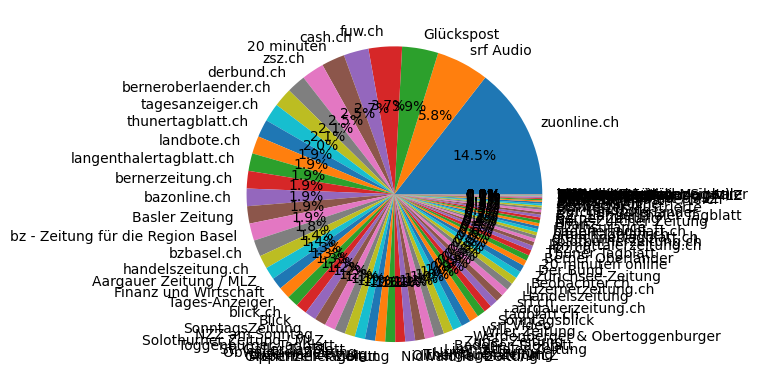

In [5]:
plt.pie(df['medium_name'].value_counts(), labels=df['medium_name'].unique().tolist(), autopct='%1.1f%%')
plt.show()

In [6]:
df["medium_name"].unique()

array(['zuonline.ch', 'srf Audio', 'Glückspost', 'fuw.ch', 'cash.ch',
       '20 minuten', 'zsz.ch', 'derbund.ch', 'berneroberlaender.ch',
       'tagesanzeiger.ch', 'thunertagblatt.ch', 'landbote.ch',
       'langenthalertagblatt.ch', 'bernerzeitung.ch', 'bazonline.ch',
       'Basler Zeitung', 'bz - Zeitung für die Region Basel',
       'bzbasel.ch', 'handelszeitung.ch', 'Aargauer Zeitung / MLZ',
       'Finanz und Wirtschaft', 'Tages-Anzeiger', 'blick.ch', 'Blick',
       'SonntagsZeitung', 'NZZ am Sonntag', 'Solothurner Zeitung / MLZ',
       'Toggenburger Tagblatt', 'St. Galler Tagblatt',
       'Obwaldner Zeitung', 'Luzerner Zeitung', 'Grenchner Tagblatt',
       'Appenzeller Zeitung', 'Nidwaldner Zeitung',
       'Oltner Tagblatt / MLZ', 'Thurgauer Zeitung', 'Urner  Zeitung',
       'Limmattaler Zeitung', 'Badener Tagblatt', 'Zuger Zeitung',
       'Werdenberger & Obertoggenburger', 'Wiler Zeitung', 'srf Video',
       'Sonntagsblick', 'tagblatt.ch', 'aargauerzeitung.ch', 'srf.c

In [7]:
# plt.pie(df['rubric'].value_counts(), labels=df['rubric'].unique().tolist(), autopct='%1.1f%%')
# plt.show()

In [8]:
import re

df["lead"] = df["content"].apply(lambda x: " ".join(re.findall(r"<ld>(.*?)</ld>", x)))
df["topic"] = df[["rubric", "head", "subhead", "lead"]].fillna("").agg(" ".join, axis=1)

df["topic"].head


<bound method NDFrame.head of 0         Raiffeisen Run auf Raiffeisen-Anteile: Tausend...
1         Regionaljournal Basel Baselland Neue Ballett-C...
2         Regionaljournal Basel Baselland Mehr Schutz fü...
3                    BERATUNG Goldkauf mit gutem Gewissen  
4         morgen-report Der FuW-Morgen-Report vom 16. Fe...
                                ...                        
109858    News - Schweiz Glarus hält wieder Landsgemeind...
109859     Glarner KB: Standard & Poor's bestätigt AA Ra...
109860     Glarner Landsgemeinde hält an Staatsgarantie ...
109861    markte Hypothekarzinsen: Schweizer ­Hypozinsen...
109862    Front Schweizer Hypozinsen steigen im Oktober ...
Name: topic, Length: 97518, dtype: object>

In [9]:
# df["rubric_cleaned"] = df["rubric"].astype(str)
# df["rubric_cleaned"] = df["rubric_cleaned"].str.lower()
# df.loc[df["rubric_cleaned"].str.startswith("wirtschaft"), "rubric_cleaned"] = "wirtschaft"
# df.loc[df["rubric_cleaned"].str.startswith("news"), "rubric_cleaned"] = "news"
# df.loc[df["rubric_cleaned"].str.startswith("meinung"), "rubric_cleaned"] = "meinung"
# df.loc[df["rubric_cleaned"].str.startswith("schweiz"), "rubric_cleaned"] = "schweiz"
# df.loc[df["rubric_cleaned"].str.startswith("markets"), "rubric_cleaned"] = "markets"
# df.loc[df["rubric_cleaned"].str.startswith("politik"), "rubric_cleaned"] = "politik"
# df.loc[df["rubric_cleaned"].str.startswith("finanz"), "rubric_cleaned"] = "finanz"
# df.loc[df["rubric_cleaned"].str.startswith("company"), "rubric_cleaned"] = "company"
# df.loc[df["rubric_cleaned"].str.startswith("municipality"), "rubric_cleaned"] = "municipality"
# df.loc[df["rubric_cleaned"].str.startswith("sport"), "rubric_cleaned"] = "sport"
# df.loc[df["rubric_cleaned"].str.startswith("leben"), "rubric_cleaned"] = "leben"
# df.loc[df["rubric_cleaned"].str.startswith("invest"), "rubric_cleaned"] = "invest"
# df.loc[df["rubric_cleaned"].str.startswith("community"), "rubric_cleaned"] = "community"
# # df["rubric"] = df["rubric"].apply(lambda x: "wirtschaft" if isinstance(x, str) and x.startswith("wirtschaft") else x)
# rubric = df["rubric_cleaned"].value_counts().reset_index()
# rubric


idea:

- make small number of well defined but different categories (econ, sport, war etc)
- look at text characteristics, i.e. term frequency etc
- compare these characteristics -> do they differ accross categories
- if yes, use ml or something to give articles without category a category
- filter according to category

maybe more rules: i.e. named entity appears only once and "sponsor" appears too in same sentence?
maybe name of bank (incl abbreviations) must appear at minimum x times / x percent?

--> AVOID GARBAGE IN GARBAGE OUT

In [10]:
df[df["content_id"] == "03a801e8-e72c-d3e2-8276-69ebd9a7816a"]

,id,pubtime,medium_code,medium_name,rubric,regional,doctype,doctype_description,language,char_count,dateline,head,subhead,content_id,content,query_bank,lead,topic
18,47225409,2022-08-11 08:00:17+02,FUWO,fuw.ch,Unternehmen,NaN,WWE,Online medium,de,2612,NaN,BKB erhöht Gewinn,NaN,03a801e8-e72c-d3e2-8276-69ebd9a7816a,<tx><ld><p>Die Basler Kantonalbank profitiert ...,kantonalbank_baselstadt,<p>Die Basler Kantonalbank profitiert im erste...,Unternehmen BKB erhöht Gewinn <p>Die Basler K...


In [11]:
# import re

# keywords_wirtschaft = ["wirtschaft", "finanz", "bank", "geld", "m(?:a|ae|[ä])rkt", "market", "b(?:[ö]|oe)rse", "aktie", "zins", "obligation", "hypothek", "company", "unternehmen", "invest",
#                        "inflation", "derivate", "devisen", "franken", "dollar", "immobilie", "euro", "credit", "cs", "ubs", "snb", "jordan"]
# pattern = "|".join(keywords_wirtschaft)
# regex = re.compile(pattern, re.IGNORECASE)
# df["rubric_cleaned"] = df["rubric_cleaned"].apply(lambda text: "wirtschaft" if regex.search(text) else text)

# keywords_ukraine = ["ukraine", "russland", "putin"]
# pattern = "|".join(keywords_ukraine)
# regex = re.compile(pattern, re.IGNORECASE)
# df["rubric_cleaned"] = df["rubric_cleaned"].apply(lambda text: "ukrainekrieg" if regex.search(text) else text)

# keywords_sport = ["sport", "fussball", "ski", "tennis", "federer", "djokovic"]
# pattern = "|".join(keywords_sport)
# regex = re.compile(pattern, re.IGNORECASE)
# df["rubric_cleaned"] = df["rubric_cleaned"].apply(lambda text: "sport" if regex.search(text) else text)

# keywords_energie = ["energie"]
# pattern = "|".join(keywords_energie)
# regex = re.compile(pattern, re.IGNORECASE)
# df["rubric_cleaned"] = df["rubric_cleaned"].apply(lambda text: "energie" if regex.search(text) else text)

# rubric = df["rubric_cleaned"].value_counts().reset_index()
# rubric


In [34]:
# df[df["head"].str.startswith("Bürohr")]["content"].iloc[0]
ii = 1

In [117]:
import gensim
def myfunction(text):
    print(text)
    text = data.transform.preprocess.remove_tags(text)
    text = data.transform.preprocess.tokenize(text)
    text = data.transform.preprocess.remove_stopwords(text, language="german")
    text = data.transform.preprocess.remove_punctuation(text)
    text = data.transform.preprocess.lemmatize(text)
    text = [t[1] for t in text if t[2] in ["NN", "NE"]]
    print(type(text))

    dictionary = gensim.corpora.Dictionary([text])
    corpus = [dictionary.doc2bow(text)]
    num_topics = 2
    lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
    
    # Get topic names for all topics
    topic_names = {}
    num_top_words = 10

    for topic_id in range(num_topics):
        top_words = lda_model.show_topic(topic_id, num_top_words)
        topic_name = " ".join([word for word, _ in top_words])
        topic_names[topic_id] = topic_name

    # Display topic names
    for topic_id, name in topic_names.items():
        print(f"Topic {topic_id}: {name}")

    # Get document topic distribution
    for i, doc in enumerate(corpus):
        topic_distribution = lda_model.get_document_topics(doc)
        print(f"\nDocument {i + 1} Topic Distribution: {topic_distribution}")

text = df["content"].iloc[ii]
ii = ii+1
print(df["rubric"].iloc[ii])
myfunction(text)

nan
<tx><ld><p>Nestlé hält das flotte Wachstumstempo im Schlussquartal aufrecht. Die Angst vor Margendruck bleibt jedoch. Der diesjährige Ausblick verstärkt diese sogar noch. Dennoch fängt sich die Aktie wieder.</p></ld><p><au>Von Lorenz Burkhalter</au></p><p>Die<a href="https://www.cash.ch/aktien/nestle-n-3886335/swx/chf">Nestlé</a>-Aktie kann am Donnerstag anfängliche Kursverluste abschütteln. Nach einem Rücksetzer auf 115,44 Franken gewinnt das Schwergewicht zur Stunde sogar 0,1 Prozent auf 117,42 Franken.</p><p>Zwar war es dem Nahrungsmittelkonzern aus Vevey auch im vierten Quartal möglich, die Absatzpreise um gut 3 Prozent zu steigern. Allerdings konnten die Preisanpassungen nicht mit den steigenden Herstellkosten mithalten. Entsprechende Spuren finden sich im Jahresergebnis, liegt der operative Jahresgewinn (EBIT) mit 15,12 Milliarden Franken trotz eines deutlich höher als erwartet ausgefallenen Umsatzes doch geringfügig hinter den Schätzungen der Analysten zurück.</p><p>Und auch

In [49]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [13]:


df["text"] = df["topic"].apply(data.transform.preprocess.remove_tags)
df["text"].head

<bound method NDFrame.head of 0         Raiffeisen Run auf Raiffeisen-Anteile: Tausend...
1         Regionaljournal Basel Baselland Neue Ballett-C...
2         Regionaljournal Basel Baselland Mehr Schutz fü...
3                    BERATUNG Goldkauf mit gutem Gewissen  
4         morgen-report Der FuW-Morgen-Report vom 16. Fe...
                                ...                        
109858    News - Schweiz Glarus hält wieder Landsgemeind...
109859     Glarner KB: Standard & Poor's bestätigt AA Ra...
109860     Glarner Landsgemeinde hält an Staatsgarantie ...
109861    markte Hypothekarzinsen: Schweizer ­Hypozinsen...
109862    Front Schweizer Hypozinsen steigen im Oktober ...
Name: text, Length: 97518, dtype: object>

In [14]:
df["text"] = df["text"].apply(data.transform.preprocess.tokenize)
df["text"].head

<bound method NDFrame.head of 0         [Raiffeisen, Run, auf, Raiffeisen-Anteile, :, ...
1         [Regionaljournal, Basel, Baselland, Neue, Ball...
2         [Regionaljournal, Basel, Baselland, Mehr, Schu...
3                [BERATUNG, Goldkauf, mit, gutem, Gewissen]
4         [morgen-report, Der, FuW-Morgen-Report, vom, 1...
                                ...                        
109858    [News, -, Schweiz, Glarus, hält, wieder, Lands...
109859    [Glarner, KB, :, Standard, &, Poor, 's, bestät...
109860    [Glarner, Landsgemeinde, hält, an, Staatsgaran...
109861    [markte, Hypothekarzinsen, :, Schweizer, ­Hypo...
109862    [Front, Schweizer, Hypozinsen, steigen, im, Ok...
Name: text, Length: 97518, dtype: object>

In [16]:
df["text"] = df["text"].apply(data.transform.preprocess.remove_stopwords, args=("german"))
df["text"].head

TypeError: remove_stopwords() takes 2 positional arguments but 7 were given

In [29]:
test = data.transform.preprocess.remove_punctuation(test)
test

['Beim',
 'FC',
 'Basel',
 'läuft',
 'Partie',
 'heute',
 'Abend',
 '20.30',
 'Uhr',
 'live',
 'Ticker',
 'FC',
 'St.',
 'Gallen',
 'rund',
 'ersten',
 'Partie',
 'Patrick',
 'Rahmen',
 'gab',
 'neuen',
 'Trainer',
 'Guillermo',
 'Abascal',
 '32',
 '2:4-Pleite',
 'FC',
 'Zürich',
 'Seither',
 'paar',
 'Tage',
 'vergangen',
 'Ruhe',
 'eingekehrt',
 'wurde',
 'gestern',
 'bekannt',
 'Basler',
 'Kantonalbank',
 'Rotblau',
 'mehr',
 'sponsern',
 'FCB',
 'verliert',
 'somit',
 '15',
 'Jahren',
 'Premiumpartner',
 'Informationen',
 '20',
 'Minuten',
 'zahlte',
 'Bank',
 'Club',
 'rund',
 '700000',
 'Franken',
 'pro',
 'Jahr',
 'Bank',
 'erklärt',
 'Communiqué',
 'Schritt',
 'Strategiewechsel',
 'Dani',
 'Büchi',
 'Delegierter',
 'FCB-Verwaltungsrats',
 'meint',
 'bedauern',
 'Entscheid',
 'BKB',
 'natürlich',
 'sehr.',
 'Verlust',
 'Sponsors',
 'gab',
 'ja',
 'Instagram-Ansage',
 'Nati-Captain',
 'Ex-FCB-Star',
 'Granit',
 'Xhaka',
 'scharfen',
 'Worten',
 'attackierte',
 'neue',
 'Vereinsfü

In [30]:
test = data.transform.preprocess.lemmatize(test)
test

[('Beim', 'bei', 'APPRART'),
 ('FC', 'Fc', 'NN'),
 ('Basel', 'Basel', 'NE'),
 ('läuft', 'laufen', 'VV(FIN)'),
 ('Partie', 'Partie', 'NN'),
 ('heute', 'heute', 'ADV'),
 ('Abend', 'abend', 'ADV'),
 ('20.30', '20.30', 'CARD'),
 ('Uhr', 'Uhr', 'NN'),
 ('live', 'live', 'ADJ(D)'),
 ('Ticker', 'Ticker', 'NN'),
 ('FC', 'Fc', 'NN'),
 ('St.', 'St.', 'NE'),
 ('Gallen', 'Gallen', 'NE'),
 ('rund', 'rund', 'ADV'),
 ('ersten', 'erst', 'ADJ(A)'),
 ('Partie', 'Partie', 'NN'),
 ('Patrick', 'Patrick', 'NE'),
 ('Rahmen', 'Rahmen', 'NN'),
 ('gab', 'geben', 'VV(FIN)'),
 ('neuen', 'neu', 'ADJ(A)'),
 ('Trainer', 'Trainer', 'NN'),
 ('Guillermo', 'Guillermo', 'NE'),
 ('Abascal', 'Abascal', 'NE'),
 ('32', '32', 'CARD'),
 ('2:4-Pleite', '2:4-pleit', 'ADJ(A)'),
 ('FC', 'Fc', 'NN'),
 ('Zürich', 'Zürich', 'NE'),
 ('Seither', 'seither', 'ADV'),
 ('paar', 'paar', 'PIAT'),
 ('Tage', 'Tag', 'NN'),
 ('vergangen', 'vergangen', 'ADJ(D)'),
 ('Ruhe', 'Ruhe', 'NN'),
 ('eingekehrt', 'einkehren', 'VV(PP)'),
 ('wurde', 'werden',

In [31]:
test = [t for t in test if t[2] in ["NN"]]
test

[('FC', 'Fc', 'NN'),
 ('Partie', 'Partie', 'NN'),
 ('Uhr', 'Uhr', 'NN'),
 ('Ticker', 'Ticker', 'NN'),
 ('FC', 'Fc', 'NN'),
 ('Partie', 'Partie', 'NN'),
 ('Rahmen', 'Rahmen', 'NN'),
 ('Trainer', 'Trainer', 'NN'),
 ('FC', 'Fc', 'NN'),
 ('Tage', 'Tag', 'NN'),
 ('Ruhe', 'Ruhe', 'NN'),
 ('Kantonalbank', 'Kantonalbank', 'NN'),
 ('FCB', 'Fc', 'NN'),
 ('Jahren', 'Jahr', 'NN'),
 ('Premiumpartner', 'Premiumpartner', 'NN'),
 ('Informationen', 'Information', 'NN'),
 ('Minuten', 'Minute', 'NN'),
 ('Bank', 'Bank', 'NN'),
 ('Franken', 'Franken', 'NN'),
 ('Jahr', 'Jahr', 'NN'),
 ('Bank', 'Bank', 'NN'),
 ('Schritt', 'Schritt', 'NN'),
 ('Strategiewechsel', 'Strategiewechsel', 'NN'),
 ('FCB-Verwaltungsrats', 'Fcb-verwaltungsrat', 'NN'),
 ('Entscheid', 'Entscheid', 'NN'),
 ('Verlust', 'Verlust', 'NN'),
 ('Sponsors', 'Sponsor', 'NN'),
 ('Instagram-Ansage', 'Instagram-ansage', 'NN'),
 ('Worten', 'Wort', 'NN'),
 ('Vereinsführung', 'Vereinsführung', 'NN'),
 ('Frage', 'Frage', 'NN'),
 ('Bruder', 'Bruder', 'NN'

In [32]:
import gensim
id2word = gensim.corpora.Dictionary(test)
id2word
id2word[[0][:1][0]]

'FC'

In [33]:
test = [t[1] for t in test]
test[0:5]

['Fc', 'Partie', 'Uhr', 'Ticker', 'Fc']

In [34]:
corpus = []
for text in test:
    new = id2word.doc2bow(test)
    corpus.append(new)

In [35]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")

lda_model.top_topics(corpus)
lda_model.print_topics()

[(0,
  '0.102*"Fc" + 0.070*"Partie" + 0.061*"Bank" + 0.056*"Ruhe" + 0.051*"Jahr" + 0.049*"Trainer" + 0.048*"Frage" + 0.045*"Bruder" + 0.042*"Minute" + 0.027*"Verlust"'),
 (1,
  '0.027*"Fc" + 0.024*"Minute" + 0.024*"Ruhe" + 0.024*"Partie" + 0.023*"Trainer" + 0.023*"Frage" + 0.023*"Jahr" + 0.023*"Bank" + 0.023*"Bruder" + 0.023*"Post"'),
 (2,
  '0.022*"Partie" + 0.022*"Fc" + 0.022*"Trainer" + 0.022*"Ruhe" + 0.022*"Bruder" + 0.022*"Bank" + 0.022*"Minute" + 0.022*"Frage" + 0.022*"Jahr" + 0.022*"Sponsor"'),
 (3,
  '0.109*"Fc" + 0.069*"Ruhe" + 0.065*"Bank" + 0.059*"Partie" + 0.043*"Minute" + 0.041*"Bruder" + 0.038*"Frage" + 0.037*"Trainer" + 0.036*"Jahr" + 0.024*"Rahmen"'),
 (4,
  '0.022*"Fc" + 0.022*"Trainer" + 0.022*"Frage" + 0.022*"Minute" + 0.022*"Ruhe" + 0.022*"Partie" + 0.022*"Fcb-verwaltungsrat" + 0.022*"Bruder" + 0.022*"Jahr" + 0.022*"Bank"')]